In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
doTrain=True
doLoadModel=True
doLoadMetrics=True
doPlotMetrics=True
doPredict=True
doLoadPredict=True
doCalculateMetrics2=True
doPlotMetrics2=True

modelName="ModelAdam001_min0"
numberOfEpochs=300
batchSize=100000

In [3]:
os.getcwd()

'/Users/luizaadelinaciucu/Work/ATLAS/TrackML'

In [4]:
def p(name,nparray):
    print("Start",name)
    print(nparray)
    print("End",name,"shape",nparray.shape,"type",type(nparray))
# done function

In [5]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackML/outputC2"

In [6]:
#eventNumber="000000082"
eventNumber="all"
nparray_Input_Train=np.load(outputFolder+"/NN_2_data_Input_Train_"+eventNumber+".npy")
nparray_Input_Test=np.load(outputFolder+"/NN_2_data_Input_Test_"+eventNumber+".npy")
nparray_Output_Train=np.load(outputFolder+"/NN_2_data_Output_Train_"+eventNumber+".npy")
nparray_Output_Test=np.load(outputFolder+"/NN_2_data_Output_Test_"+eventNumber+".npy")

In [7]:
p("Input_Train",nparray_Input_Train)

Start Input_Train
[[[-3.23306e+01]
  [-4.28872e+00]
  [-4.62092e+02]
  ...
  [-8.93000e+01]
  [-1.51782e+01]
  [-1.30250e+03]]

 [[-3.04775e+01]
  [-9.58902e+00]
  [-4.21256e+02]
  ...
  [-1.12212e+02]
  [-4.01146e+01]
  [-1.49800e+03]]

 [[-3.19316e+01]
  [-5.42998e+00]
  [-4.84890e+02]
  ...
  [-8.34928e+01]
  [-1.48256e+01]
  [-1.29800e+03]]

 ...

 [[-3.13739e+01]
  [ 2.04705e+00]
  [ 4.87235e+02]
  ...
  [-6.26886e+01]
  [ 6.31295e+00]
  [ 9.57500e+02]]

 [[-3.09550e+01]
  [ 9.47315e+00]
  [ 4.64051e+02]
  ...
  [-4.04887e+01]
  [ 1.09354e+01]
  [ 5.97500e+02]]

 [[-3.31662e+01]
  [-3.98620e-01]
  [ 4.46810e+02]
  ...
  [-7.94153e+01]
  [ 2.56644e-01]
  [ 1.09750e+03]]]
End Input_Train shape (478540, 60, 1) type <class 'numpy.ndarray'>


In [8]:
p("Input_Test",nparray_Input_Test)

Start Input_Test
[[[  -30.0484 ]
  [  -10.8162 ]
  [ -427.981  ]
  ...
  [  -47.7968 ]
  [  -14.5214 ]
  [ -702.     ]]

 [[  -31.7544 ]
  [   -5.93686]
  [ -455.191  ]
  ...
  [ -102.996  ]
  [  -17.4721 ]
  [-1498.     ]]

 [[  -29.4708 ]
  [  -12.4681 ]
  [ -490.013  ]
  ...
  [  -39.9262 ]
  [  -16.6192 ]
  [ -702.     ]]

 ...

 [[  -31.0072 ]
  [    8.54729]
  [  490.278  ]
  ...
  [  -57.7747 ]
  [   15.953  ]
  [  962.     ]]

 [[  -31.2786 ]
  [    3.73645]
  [  479.993  ]
  ...
  [  -59.8624 ]
  [    7.09361]
  [  957.5    ]]

 [[  -31.2528 ]
  [    4.19333]
  [  450.675  ]
  ...
  [  -67.8425 ]
  [   11.5825 ]
  [  962.     ]]]
End Input_Test shape (478540, 60, 1) type <class 'numpy.ndarray'>


In [9]:
p ("Output_Train", nparray_Output_Train)

Start Output_Train
[[-1  1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ... -1  1  1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
End Output_Train shape (478540, 20) type <class 'numpy.ndarray'>


In [10]:
p ("Output_Test",nparray_Output_Test)

Start Output_Test
[[ 1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ...  1 -1 -1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
End Output_Test shape (478540, 20) type <class 'numpy.ndarray'>


Creating model

In [11]:
#np.random.seed(98383822)
np.random.seed(18383822) # this line must be before importing keras
import keras
nrNodesInputLayer=nparray_Input_Train.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_Output_Train.shape[1] # one output for each hit in the batch

Using TensorFlow backend.


In [12]:
def get_model():
    
    # nr nodes on the hidden layers
    k=5
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    
    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                #optimizer=keras.optimizers.Adadelta(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                metrics=['binary_accuracy','categorical_accuracy'])

   # now model is done we are ready to train 
    return model
# done function 

In [13]:
model=get_model()

In [14]:
def train_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start train_model for modeName",modelName,"***")
    # train the model and return for each epoch the accuracy and loss values
    # in a variable called history
    history=model.fit(
            nparray_Input_Train,
            nparray_Output_Train,
            batchSize,numberOfEpochs,
            validation_data=(nparray_Input_Test,nparray_Output_Test),
            shuffle=False
            )
    # the train (fit) function outputs a history
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracyBinary_Train=history.history["binary_accuracy"]
    nparray_accuracyCategorical_Train=history.history["categorical_accuracy"]
    nparray_accuracyBinary_Test=history.history["val_binary_accuracy"]
    nparray_accuracyCategorical_Test=history.history["val_categorical_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]
    
    # save the loss, accuracies, weights + biases of the trained model to a file
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyBinaryTrain=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Train.npy"
    outputFileNameAccuracyCategoricalTrain=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Train.npy"
    outputFileNameAccuracyBinaryTest=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Test.npy"
    outputFileNameAccuracyCategoricalTest=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Test.npy"
    outputFileNameLossTrain=outputFolder+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolder+"/"+outputFileNameStem+"_loss_Test.npy"
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolder+"/"+outputFileNameStem+"_weights.hdf5"
    
    # save to files
    #
    np.save(outputFileNameAccuracyBinaryTrain,nparray_accuracyBinary_Train)
    np.save(outputFileNameAccuracyBinaryTest,nparray_accuracyBinary_Test)
    np.save(outputFileNameAccuracyCategoricalTrain,nparray_accuracyCategorical_Train)
    np.save(outputFileNameAccuracyCategoricalTest,nparray_accuracyCategorical_Test)
    np.save(outputFileNameLossTrain,nparray_loss_Train)
    np.save(outputFileNameLossTest,nparray_loss_Test)
    #
    model.save_weights(outputFileNameWeights)

    # ready to return
    return (model,nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [15]:
if doTrain:
    model,nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test=train_model(model,modelName=modelName,numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start train_model for modeName ModelAdam001_min0 ***
Train on 478540 samples, validate on 478540 samples
Epoch 1/300
478540/478540 [==============================] - 40s 84us/step - loss: 1.7002 - binary_accuracy: 0.5725 - categorical_accuracy: 0.1377 - val_loss: 1.5418 - val_binary_accuracy: 0.6136 - val_categorical_accuracy: 0.0969
Epoch 2/300
478540/478540 [==============================] - 34s 71us/step - loss: 1.5165 - binary_accuracy: 0.6200 - categorical_accuracy: 0.0824 - val_loss: 1.4571 - val_binary_accuracy: 0.6350 - val_categorical_accuracy: 0.0803
Epoch 3/300
478540/478540 [==============================] - 33s 69us/step - loss: 1.4470 - binary_accuracy: 0.6376 - categorical_accuracy: 0.0843 - val_loss: 1.4326 - val_binary_accuracy: 0.6413 - val_categorical_accuracy: 0.0908
Epoch 4/300
478540/478540 [==============================] - 31s 65us/step - loss: 1.4221 - binary_accuracy: 0.6440 - categorical_accuracy: 0.0912 - val_loss: 1.4041 - val_binary_accuracy: 0.6485 - 

Epoch 36/300
478540/478540 [==============================] - 32s 68us/step - loss: 1.2764 - binary_accuracy: 0.6804 - categorical_accuracy: 0.1550 - val_loss: 1.2780 - val_binary_accuracy: 0.6800 - val_categorical_accuracy: 0.1561
Epoch 37/300
478540/478540 [==============================] - 32s 67us/step - loss: 1.2768 - binary_accuracy: 0.6803 - categorical_accuracy: 0.1539 - val_loss: 1.2766 - val_binary_accuracy: 0.6804 - val_categorical_accuracy: 0.1576
Epoch 38/300
478540/478540 [==============================] - 32s 67us/step - loss: 1.2752 - binary_accuracy: 0.6807 - categorical_accuracy: 0.1582 - val_loss: 1.2770 - val_binary_accuracy: 0.6803 - val_categorical_accuracy: 0.1578
Epoch 39/300
478540/478540 [==============================] - 32s 68us/step - loss: 1.2754 - binary_accuracy: 0.6807 - categorical_accuracy: 0.1553 - val_loss: 1.2725 - val_binary_accuracy: 0.6814 - val_categorical_accuracy: 0.1584
Epoch 40/300
478540/478540 [==============================] - 32s 66us/s

478540/478540 [==============================] - 32s 66us/step - loss: 1.2129 - binary_accuracy: 0.6962 - categorical_accuracy: 0.2634 - val_loss: 1.2099 - val_binary_accuracy: 0.6970 - val_categorical_accuracy: 0.2535
Epoch 72/300
478540/478540 [==============================] - 32s 66us/step - loss: 1.2095 - binary_accuracy: 0.6971 - categorical_accuracy: 0.2509 - val_loss: 1.2039 - val_binary_accuracy: 0.6985 - val_categorical_accuracy: 0.2572
Epoch 73/300
478540/478540 [==============================] - 31s 66us/step - loss: 1.2030 - binary_accuracy: 0.6987 - categorical_accuracy: 0.2706 - val_loss: 1.2000 - val_binary_accuracy: 0.6995 - val_categorical_accuracy: 0.2746
Epoch 74/300
478540/478540 [==============================] - 32s 66us/step - loss: 1.1985 - binary_accuracy: 0.6999 - categorical_accuracy: 0.2767 - val_loss: 1.1934 - val_binary_accuracy: 0.7011 - val_categorical_accuracy: 0.2894
Epoch 75/300
478540/478540 [==============================] - 32s 67us/step - loss: 1

478540/478540 [==============================] - 39s 81us/step - loss: 1.1574 - binary_accuracy: 0.7102 - categorical_accuracy: 0.3846 - val_loss: 1.1575 - val_binary_accuracy: 0.7101 - val_categorical_accuracy: 0.3968
Epoch 107/300
478540/478540 [==============================] - 34s 70us/step - loss: 1.1563 - binary_accuracy: 0.7104 - categorical_accuracy: 0.3930 - val_loss: 1.1586 - val_binary_accuracy: 0.7099 - val_categorical_accuracy: 0.3911
Epoch 108/300
478540/478540 [==============================] - 33s 70us/step - loss: 1.1564 - binary_accuracy: 0.7104 - categorical_accuracy: 0.3926 - val_loss: 1.1586 - val_binary_accuracy: 0.7099 - val_categorical_accuracy: 0.3942
Epoch 109/300
478540/478540 [==============================] - 33s 70us/step - loss: 1.1561 - binary_accuracy: 0.7105 - categorical_accuracy: 0.3924 - val_loss: 1.1579 - val_binary_accuracy: 0.7100 - val_categorical_accuracy: 0.3954
Epoch 110/300
478540/478540 [==============================] - 33s 70us/step - los

478540/478540 [==============================] - 25s 53us/step - loss: 1.1392 - binary_accuracy: 0.7147 - categorical_accuracy: 0.4039 - val_loss: 1.1403 - val_binary_accuracy: 0.7145 - val_categorical_accuracy: 0.4010
Epoch 142/300
478540/478540 [==============================] - 25s 53us/step - loss: 1.1409 - binary_accuracy: 0.7143 - categorical_accuracy: 0.4010 - val_loss: 1.1410 - val_binary_accuracy: 0.7143 - val_categorical_accuracy: 0.4005
Epoch 143/300
478540/478540 [==============================] - 25s 53us/step - loss: 1.1390 - binary_accuracy: 0.7148 - categorical_accuracy: 0.4013 - val_loss: 1.1425 - val_binary_accuracy: 0.7139 - val_categorical_accuracy: 0.4022
Epoch 144/300
478540/478540 [==============================] - 25s 53us/step - loss: 1.1398 - binary_accuracy: 0.7146 - categorical_accuracy: 0.4046 - val_loss: 1.1426 - val_binary_accuracy: 0.7139 - val_categorical_accuracy: 0.4102
Epoch 145/300
478540/478540 [==============================] - 25s 53us/step - los

478540/478540 [==============================] - 25s 53us/step - loss: 1.1322 - binary_accuracy: 0.7165 - categorical_accuracy: 0.4182 - val_loss: 1.1343 - val_binary_accuracy: 0.7160 - val_categorical_accuracy: 0.4166
Epoch 177/300
478540/478540 [==============================] - 25s 53us/step - loss: 1.1327 - binary_accuracy: 0.7164 - categorical_accuracy: 0.4148 - val_loss: 1.1349 - val_binary_accuracy: 0.7158 - val_categorical_accuracy: 0.4124
Epoch 178/300
478540/478540 [==============================] - 25s 53us/step - loss: 1.1324 - binary_accuracy: 0.7164 - categorical_accuracy: 0.4098 - val_loss: 1.1384 - val_binary_accuracy: 0.7149 - val_categorical_accuracy: 0.4072
Epoch 179/300
478540/478540 [==============================] - 26s 55us/step - loss: 1.1363 - binary_accuracy: 0.7155 - categorical_accuracy: 0.4041 - val_loss: 1.1338 - val_binary_accuracy: 0.7161 - val_categorical_accuracy: 0.4089
Epoch 180/300
478540/478540 [==============================] - 27s 56us/step - los

478540/478540 [==============================] - 43s 91us/step - loss: 1.1255 - binary_accuracy: 0.7182 - categorical_accuracy: 0.4199 - val_loss: 1.1291 - val_binary_accuracy: 0.7173 - val_categorical_accuracy: 0.4176
Epoch 212/300
478540/478540 [==============================] - 39s 82us/step - loss: 1.1251 - binary_accuracy: 0.7183 - categorical_accuracy: 0.4156 - val_loss: 1.1266 - val_binary_accuracy: 0.7179 - val_categorical_accuracy: 0.4125
Epoch 213/300
478540/478540 [==============================] - 26s 54us/step - loss: 1.1259 - binary_accuracy: 0.7181 - categorical_accuracy: 0.4128 - val_loss: 1.1279 - val_binary_accuracy: 0.7176 - val_categorical_accuracy: 0.4145
Epoch 214/300
478540/478540 [==============================] - 26s 54us/step - loss: 1.1255 - binary_accuracy: 0.7182 - categorical_accuracy: 0.4179 - val_loss: 1.1273 - val_binary_accuracy: 0.7177 - val_categorical_accuracy: 0.4159
Epoch 215/300
478540/478540 [==============================] - 35s 74us/step - los

478540/478540 [==============================] - 31s 65us/step - loss: 1.1210 - binary_accuracy: 0.7193 - categorical_accuracy: 0.4183 - val_loss: 1.1239 - val_binary_accuracy: 0.7185 - val_categorical_accuracy: 0.4177
Epoch 247/300
478540/478540 [==============================] - 31s 65us/step - loss: 1.1218 - binary_accuracy: 0.7191 - categorical_accuracy: 0.4170 - val_loss: 1.1252 - val_binary_accuracy: 0.7182 - val_categorical_accuracy: 0.4157
Epoch 248/300
478540/478540 [==============================] - 31s 65us/step - loss: 1.1220 - binary_accuracy: 0.7190 - categorical_accuracy: 0.4203 - val_loss: 1.1246 - val_binary_accuracy: 0.7184 - val_categorical_accuracy: 0.4252
Epoch 249/300
478540/478540 [==============================] - 31s 64us/step - loss: 1.1227 - binary_accuracy: 0.7188 - categorical_accuracy: 0.4250 - val_loss: 1.1232 - val_binary_accuracy: 0.7187 - val_categorical_accuracy: 0.4275
Epoch 250/300
478540/478540 [==============================] - 31s 65us/step - los

478540/478540 [==============================] - 31s 64us/step - loss: 1.1170 - binary_accuracy: 0.7202 - categorical_accuracy: 0.4246 - val_loss: 1.1186 - val_binary_accuracy: 0.7199 - val_categorical_accuracy: 0.4227
Epoch 282/300
478540/478540 [==============================] - 31s 64us/step - loss: 1.1170 - binary_accuracy: 0.7202 - categorical_accuracy: 0.4251 - val_loss: 1.1179 - val_binary_accuracy: 0.7200 - val_categorical_accuracy: 0.4261
Epoch 283/300
478540/478540 [==============================] - 30s 63us/step - loss: 1.1165 - binary_accuracy: 0.7204 - categorical_accuracy: 0.4297 - val_loss: 1.1183 - val_binary_accuracy: 0.7199 - val_categorical_accuracy: 0.4352
Epoch 284/300
478540/478540 [==============================] - 31s 64us/step - loss: 1.1160 - binary_accuracy: 0.7205 - categorical_accuracy: 0.4294 - val_loss: 1.1172 - val_binary_accuracy: 0.7202 - val_categorical_accuracy: 0.4204
Epoch 285/300
478540/478540 [==============================] - 30s 63us/step - los

In [16]:
def load_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start load_model for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolder+"/"+outputFileNameStem+"_weights.hdf5"
    
    # load the weights and biases
    model.load_weights(outputFileNameWeights)

    # ready to return
    return model
# done function

In [17]:
if doLoadModel:
    model=load_model(model,modelName,numberOfEpochs,batchSize)

*** Start load_model for modeName ModelAdam001_min0 ***


In [18]:
def load_metrics(modelName,numberOfEpochs,batchSize):
    print("*** Start load_metrics for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyBinaryTrain=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Train.npy"
    outputFileNameAccuracyCategoricalTrain=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Train.npy"
    outputFileNameAccuracyBinaryTest=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Test.npy"
    outputFileNameAccuracyCategoricalTest=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Test.npy"
    outputFileNameLossTrain=outputFolder+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolder+"/"+outputFileNameStem+"_loss_Test.npy"
    
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracyBinary_Train=np.load(outputFileNameAccuracyBinaryTrain)
    nparray_accuracyBinary_Test=np.load(outputFileNameAccuracyBinaryTest)
    nparray_accuracyCategorical_Train=np.load(outputFileNameAccuracyCategoricalTrain)
    nparray_accuracyCategorical_Test=np.load(outputFileNameAccuracyCategoricalTest)
    nparray_loss_Train=np.load(outputFileNameLossTrain)
    nparray_loss_Test=np.load(outputFileNameLossTest)

    # ready to return
    return (nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [19]:
if doLoadMetrics:
    nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test=load_metrics(modelName=modelName,numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start load_metrics for modeName ModelAdam001_min0 ***


In [20]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,modelName):
    plt.plot(nparray_accuracyBinary_Train)
    plt.plot(nparray_accuracyBinary_Test)
    plt.plot(nparray_accuracyCategorical_Train)
    plt.plot(nparray_accuracyCategorical_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    #plt.xlim(left=0,right=10)
    # plt.ylim(bottom=0,top=0.8)
    #plt.ylim(bottom=0.75,top=0.80)
    plt.legend(['Binary Train', 'Binary Test','Categorical Train', 'Categorical Test'], loc='best')
    # plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_graph_accuracy.png")
# done function

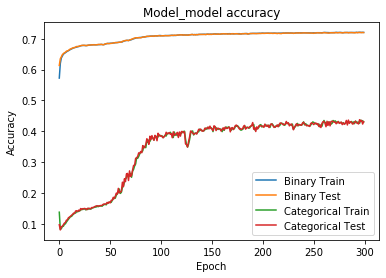

In [21]:
if doPlotMetrics:
    plot_accuracy_Train_vs_Test(nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,"model")

In [22]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_graph_loss.png")
# done function

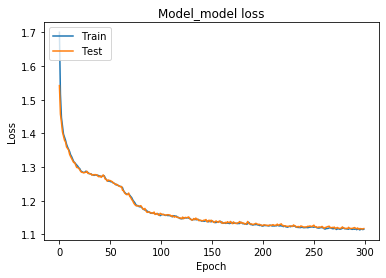

In [23]:
if doPlotMetrics:
    plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,"model")

In [24]:
def predict_from_model(model,nparray_Input_Train,nparray_Input_Test,nparray_Output_Train,nparray_Output_Test):
    outputFileNameStem="NN_4_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # Train
    nparray_PredictedOutput_Train=model.predict(nparray_Input_Train)
    p("PredictedOutput_Train",nparray_PredictedOutput_Train)
    p("Output_Train",nparray_Output_Train)
    nparray_Diff_Train=nparray_PredictedOutput_Train-nparray_Output_Train
    p("Diff_Train",nparray_Diff_Train)
    # save numpy arrays to npy files
    outputFileNamePredictedOutput_Train=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Train.npy"
    np.save(outputFileNamePredictedOutput_Train,nparray_PredictedOutput_Train)
    outputFileNameDiff_Train=outputFolder+"/"+outputFileNameStem+"_Diff_Train.npy"
    np.save(outputFileNameDiff_Train,nparray_Diff_Train)
    
    # Test
    nparray_PredictedOutput_Test=model.predict(nparray_Input_Test)
    p("PredictedOutput_Test",nparray_PredictedOutput_Test)
    p("Output_Test",nparray_Output_Test)
    nparray_Diff_Test=nparray_PredictedOutput_Test-nparray_Output_Test
    p("Diff_Test",nparray_Diff_Test)
    # save numpy arrays to npy files
    outputFileNamePredictedOutput_Test=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Test.npy"
    np.save(outputFileNamePredictedOutput_Test,nparray_PredictedOutput_Test)
    outputFileNameDiff_Test=outputFolder+"/"+outputFileNameStem+"_Diff_Test.npy"
    np.save(outputFileNameDiff_Test,nparray_Diff_Test)
    
# done function    

In [25]:
if doPredict:
    predict_from_model(model,nparray_Input_Train,nparray_Input_Test,nparray_Output_Train,nparray_Output_Test)

Start PredictedOutput_Train
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [ 0.999571   -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.          0.91227484 ... -1.         -1.
  -1.        ]
 ...
 [-1.         -1.          1.         ... -1.         -1.
  -1.        ]
 [-1.          1.          1.         ... -1.         -1.
  -1.        ]
 [-1.          1.          1.         ... -1.         -1.
  -1.        ]]
End PredictedOutput_Train shape (478540, 20) type <class 'numpy.ndarray'>
Start Output_Train
[[-1  1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ... -1  1  1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
End Output_Train shape (478540, 20) type <class 'numpy.ndarray'>
Start Diff_Train
[[ 0.         -2.          0.         ...  0.          0.
   0.        ]
 [ 1.99957103  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -2.         -0.08772516 ...  0.      

In [26]:
def load_predicted():
    outputFileNameStem="NN_4_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # Train
    outputFileNamePredictedOutput_Train=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Train.npy"
    nparray_PredictedOutput_Train=np.load(outputFileNamePredictedOutput_Train)
    outputFileNameDiff_Train=outputFolder+"/"+outputFileNameStem+"_Diff_Train.npy"
    nparray_Diff_Train=np.load(outputFileNameDiff_Train)
    
    # Test
    outputFileNamePredictedOutput_Test=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Test.npy"
    nparray_PredictedOutput_Test=np.load(outputFileNamePredictedOutput_Test)
    outputFileNameDiff_Test=outputFolder+"/"+outputFileNameStem+"_Diff_Test.npy"
    nparray_Diff_Test=np.load(outputFileNameDiff_Test)
    
    return nparray_PredictedOutput_Train, nparray_Diff_Train, nparray_PredictedOutput_Test, nparray_Diff_Test
# done function   

In [27]:
if doLoadPredict:
    nparray_PredictedOutput_Train, nparray_Diff_Train, nparray_PredictedOutput_Test, nparray_Diff_Test=load_predicted()

In [28]:
def calculate_metrics2(nparray_Output, nparray_PredictedOutput):
    #p("nparray_Output",nparray_Output)
    #p("nparray_PredictedOutput",nparray_PredictedOutput)
    
    # for loop over i (buckets)
    list_bucket_OutputPositive=[]
    list_bucket_OutputNegative=[]
    list_bucket_PredictedOutputPositive=[]
    list_bucket_PredictedOutputNegative=[]
    list_bucket_TruePositive=[]
    list_bucket_FalsePositive=[]
    list_bucket_FalseNegative=[]
    list_bucket_TrueNegative=[]
    list_bucket_acc=[]
    list_bucket_accuracy=[]
    list_bucket_precision=[]
    list_bucket_recall=[]
    
    for i in range(len(nparray_Output)):
        #if i>=1:
            #continue
        #print("bucket i",i)
        nparray_bucket_Output=nparray_Output[i]
        nparray_bucket_PredictedOutput=nparray_PredictedOutput[i]
        #p("nparray_bucket_Output",nparray_bucket_Output)
        #p("nparray_bucket_PredictedOutput",nparray_bucket_PredictedOutput)
        
        # for loop over j (hit)
        counter_hit_TP=0
        counter_hit_FP=0
        counter_hit_FN=0
        counter_hit_TN=0
        for j in range(len(nparray_bucket_Output)):
            #print ("hit j",j)
            hit_Output=nparray_bucket_Output[j]
            hit_PredictedOutput=nparray_bucket_PredictedOutput[j]
            #print("j",j,"hit_PredictedOutput - hit_Output",hit_PredictedOutput, hit_Output)
               
            # confusion matrix
            # TP FP
            # FN TN
            TP=0 # True Positive
            FP=0 # False Positive (type I error)
            FN=0 # False Negative (type II error)
            TN=0 # True Negative
            
            # for this hit ask conditions
            if hit_PredictedOutput>0:
                # the value is predicted positive
                if hit_Output>0:
                    # the value is actually positive
                    TP=1
                else:
                    # the value is actually negative 
                    FP=1
                # done if 
            else:
                # the value is predicted negative
                if hit_Output>0:
                    # the value is actually positive
                    FN=1
                else:
                    # the value is actually negative
                    TN=1
                # done if
            # done if 
            #print("i",i,"j",j,"TP",TP,"FP",FP,"FN",FN,"TN",TN)
            
            # increment counters for hits
            counter_hit_TP+=TP
            counter_hit_FP+=FP
            counter_hit_FN+=FN
            counter_hit_TN+=TN  
        # done for loop over j (hit)
        #print("i",i,"counter_hit_TP",counter_hit_TP,"counter_hit_FP",counter_hit_FP,"counter_hit_FN",counter_hit_FN,"counter_hit_TN",counter_hit_TN)

        
        bucket_OutputPositive=counter_hit_TP+counter_hit_FN 
        bucket_OutputNegative=counter_hit_FP+counter_hit_TN
        bucket_PredictedOutputPositive=counter_hit_TP+counter_hit_FP
        bucket_PredictedOutputNegative=counter_hit_FN+counter_hit_TN
        
        #print("i",i,"bucket_OutputPositive",bucket_OutputPositive)
        #print("i",i,"bucket_OutputNegative",bucket_OutputNegative)
        #print("i",i,"bucket_PredictedOutputPositive",bucket_PredictedOutputPositive)
        #print("i",i,"bucket_PredictedOutputNegative",bucket_PredictedOutputNegative)
        
        
        bucket_TruePositive=counter_hit_TP
        bucket_FalsePositive=counter_hit_FP
        bucket_FalseNegative=counter_hit_FN
        bucket_TrueNegative=counter_hit_TN

        # accuracy=(TP+TN)/(TP+FP+FN+TN)=(TP+TN)/ALL, ALL=20 (20 hits in a bucket)
        # precision=(TP)/(TP+FP)=(TP)/(all that are in reality positive)=efficiency from CERN 
        # e.g. there are 100 truth electrons, efficiency = what fraction of them are also reconstricted as electrons? 
        # recall=(TP)/(TP+FN)=(TP)/(all that are predicted positive) = one minus fake rate from CERN
        # e.g. fake rate = I have reconstructed 100 electrons. What fraction of these are not in reality truth electrons
        # fake rate = What fraction of reconstructed electrons are fake electrons?
        # fake rate = (FN)/(TP+FN) = 1 - recall
        
        bucket_accuracy=(counter_hit_TP+counter_hit_TN)/(counter_hit_TP+counter_hit_FP+counter_hit_FN+counter_hit_TN)
        if (counter_hit_TP+counter_hit_FP)==0:
            bucket_precision=0
        else:
            bucket_precision=(counter_hit_TP)/(counter_hit_TP+counter_hit_FP)
        # done if
        if counter_hit_TP+counter_hit_FN==0:
            bucket_recall=0
        else:
            bucket_recall=(counter_hit_TP)/(counter_hit_TP+counter_hit_FN)
        # done if
        #print("i",i,"bucket_accuracy",bucket_accuracy,"bucket_precision",bucket_precision,"bucket_recall",bucket_recall)
        
        bucket_acc=counter_hit_TP+counter_hit_TN
        
        # add to lists
        list_bucket_OutputPositive.append(bucket_OutputPositive)
        list_bucket_OutputNegative.append(bucket_OutputNegative)
        list_bucket_PredictedOutputPositive.append(bucket_PredictedOutputPositive)
        list_bucket_PredictedOutputNegative.append(bucket_PredictedOutputNegative)
        list_bucket_TruePositive.append(bucket_TruePositive)
        list_bucket_FalsePositive.append(bucket_FalsePositive)
        list_bucket_FalseNegative.append(bucket_FalseNegative)
        list_bucket_TrueNegative.append(bucket_TrueNegative)
        list_bucket_acc.append(bucket_acc)
        list_bucket_accuracy.append(bucket_accuracy)
        list_bucket_precision.append(bucket_precision)
        list_bucket_recall.append(bucket_recall)
        
    # done for loop over i (bucket)
    #print("list_bucket_accuracy",list_bucket_accuracy)
    #print("list_bucket_precision",list_bucket_precision)
    #print("list_bucket_recall",list_bucket_recall)
    
    # convert list to numpy array
    nparray_bucket_OutputPositive=np.array(list_bucket_OutputPositive)
    nparray_bucket_OutputNegative=np.array(list_bucket_OutputNegative)
    nparray_bucket_PredictedOutputPositive=np.array(list_bucket_PredictedOutputPositive)
    nparray_bucket_PredictedOutputNegative=np.array(list_bucket_PredictedOutputNegative)
    nparray_bucket_TruePositive=np.array(list_bucket_TruePositive)
    nparray_bucket_FalsePositive=np.array(list_bucket_FalsePositive)
    nparray_bucket_FalseNegative=np.array(list_bucket_FalseNegative)
    nparray_bucket_TrueNegative=np.array(list_bucket_TrueNegative)
    nparray_bucket_acc=np.array(list_bucket_acc)
    nparray_bucket_accuracy=np.array(list_bucket_accuracy)
    nparray_bucket_precision=np.array(list_bucket_precision)
    nparray_bucket_recall=np.array(list_bucket_recall)
    
    p("nparray_bucket_OutputPositive",nparray_bucket_OutputPositive)
    p("nparray_bucket_OutputNegative",nparray_bucket_OutputNegative)
    p("nparray_bucket_PredictedOutputPositive",nparray_bucket_PredictedOutputPositive)
    p("nparray_bucket_PredictedOutputNegative",nparray_bucket_PredictedOutputNegative)
    p("nparray_bucket_TruePositive",nparray_bucket_TruePositive)
    p("nparray_bucket_FalsePositive",nparray_bucket_FalsePositive)
    p("nparray_bucket_FalseNegative",nparray_bucket_FalseNegative)
    p("nparray_bucket_TrueNegative",nparray_bucket_TrueNegative)
    p("nparray_bucket_acc",nparray_bucket_acc)
    p("nparray_bucket_accuracy",nparray_bucket_accuracy)
    p("nparray_bucket_precision",nparray_bucket_precision)
    p("nparray_bucket_recall",nparray_bucket_recall)
    
    
    # done all, ready to return
    return nparray_bucket_OutputPositive,nparray_bucket_OutputNegative,nparray_bucket_PredictedOutputPositive,nparray_bucket_PredictedOutputNegative,nparray_bucket_TruePositive,nparray_bucket_FalsePositive,nparray_bucket_FalseNegative,nparray_bucket_TrueNegative,nparray_bucket_acc,nparray_bucket_accuracy,nparray_bucket_precision,nparray_bucket_recall
# done function

In [29]:
if doCalculateMetrics2:
    nparray_bucket_OutputPositive_Train,nparray_bucket_OutputNegative_Train,nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_TruePositive_Train,nparray_bucket_FalsePositive_Train,nparray_bucket_FalseNegative_Train,nparray_bucket_TrueNegative_Train,nparray_bucket_acc_Train,nparray_bucket_accuracy_Train,nparray_bucket_precision_Train,nparray_bucket_recall_Train=calculate_metrics2(nparray_Output_Train, nparray_PredictedOutput_Train)
    nparray_bucket_OutputPositive_Test,nparray_bucket_OutputNegative_Test,nparray_bucket_PredictedOutputPositive_Test,nparray_bucket_PredictedOutputNegative_Test,nparray_bucket_TruePositive_Test,nparray_bucket_FalsePositive_Test,nparray_bucket_FalseNegative_Test,nparray_bucket_TrueNegative_Test,nparray_bucket_acc_Test,nparray_bucket_accuracy_Test,nparray_bucket_precision_Test,nparray_bucket_recall_Test=calculate_metrics2(nparray_Output_Test, nparray_PredictedOutput_Test)

Start nparray_bucket_OutputPositive
[ 7  6 13 ...  8 11 15]
End nparray_bucket_OutputPositive shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_OutputNegative
[13 14  7 ... 12  9  5]
End nparray_bucket_OutputNegative shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_PredictedOutputPositive
[5 7 9 ... 7 9 9]
End nparray_bucket_PredictedOutputPositive shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_PredictedOutputNegative
[15 13 11 ... 13 11 11]
End nparray_bucket_PredictedOutputNegative shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_TruePositive
[0 3 8 ... 6 5 9]
End nparray_bucket_TruePositive shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_FalsePositive
[5 4 1 ... 1 4 0]
End nparray_bucket_FalsePositive shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_FalseNegative
[7 3 5 ... 2 6 6]
End nparray_bucket_FalseNegative shape (478540,) type <class 'numpy.ndarray'>
Start nparray_bucket_Tr

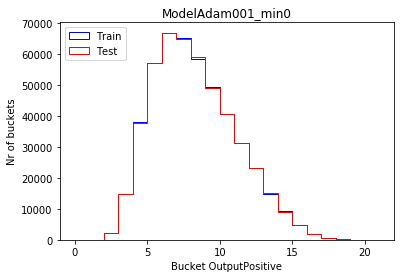

In [30]:
# overlay train and test we expect train to be better than test 
def plot_train_test_OutputPositive(nparray_bucket_OutputPositive_Train,nparray_bucket_OutputPositive_Test,modelName):
    plt.hist(nparray_bucket_OutputPositive_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_OutputPositive_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket OutputPositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_OutputPositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_OutputPositive(nparray_bucket_OutputPositive_Train,nparray_bucket_OutputPositive_Test,modelName)

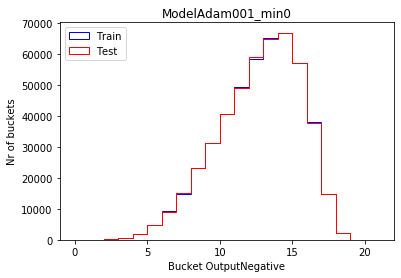

In [31]:
# overlay train and test we expect train to be better than test 
def plot_train_test_OutputNegative(nparray_bucket_OutputNegative_Train,nparray_bucket_OutputNegative_Test,modelName):
    plt.hist(nparray_bucket_OutputNegative_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_OutputNegative_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket OutputNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_OutputNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_OutputNegative(nparray_bucket_OutputNegative_Train,nparray_bucket_OutputNegative_Test,modelName)

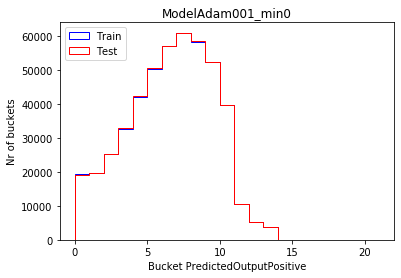

In [32]:
# overlay train and test we expect train to be better than test 
def plot_train_test_PredictedOutputPositive(nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputPositive_Test,modelName):
    plt.hist(nparray_bucket_PredictedOutputPositive_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_PredictedOutputPositive_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket PredictedOutputPositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_PredictedOutputPositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_PredictedOutputPositive(nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputPositive_Test,modelName)

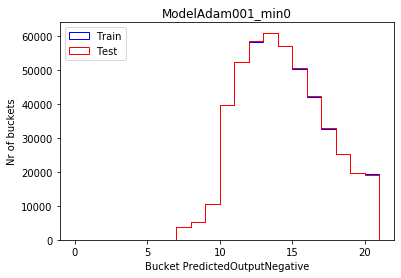

In [33]:
# overlay train and test we expect train to be better than test 
def plot_train_test_PredictedOutputNegative(nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_PredictedOutputNegative_Test,modelName):
    #p("nparray_bucket_PredictedOutputNegative_Train",nparray_bucket_PredictedOutputNegative_Train)
    #p("nparray_bucket_PredictedOutputNegative_Test",nparray_bucket_PredictedOutputNegative_Test)
    plt.hist(nparray_bucket_PredictedOutputNegative_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_PredictedOutputNegative_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket PredictedOutputNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_PredictedOutputNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_PredictedOutputNegative(nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_PredictedOutputNegative_Test,modelName)

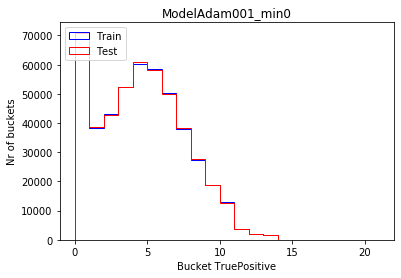

In [34]:
# overlay train and test we expect train to be better than test 
def plot_train_test_TruePositive(nparray_bucket_TruePositive_Train,nparray_bucket_TruePositive_Test,modelName):
    plt.hist(nparray_bucket_TruePositive_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_TruePositive_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket TruePositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_TruePositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_TruePositive(nparray_bucket_TruePositive_Train,nparray_bucket_TruePositive_Test,modelName)

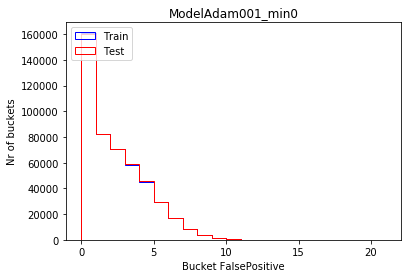

In [35]:
# overlay train and test we expect train to be better than test 
def plot_train_test_FalsePositive(nparray_bucket_FalsePositive_Train,nparray_bucket_FalsePositive_Test,modelName):
    plt.hist(nparray_bucket_FalsePositive_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_FalsePositive_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket FalsePositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_FalsePositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_FalsePositive(nparray_bucket_FalsePositive_Train,nparray_bucket_FalsePositive_Test,modelName)

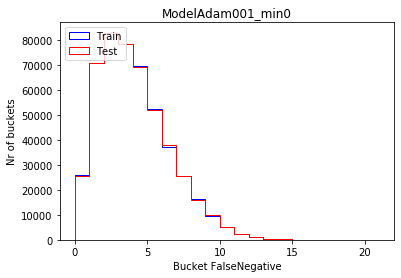

In [36]:
# overlay train and test we expect train to be better than test 
def plot_train_test_FalseNegative(nparray_bucket_FalseNegative_Train,nparray_bucket_FalseNegative_Test,modelName):
    plt.hist(nparray_bucket_FalseNegative_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_FalseNegative_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket FalseNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_FalseNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_FalseNegative(nparray_bucket_FalseNegative_Train,nparray_bucket_FalseNegative_Test,modelName)

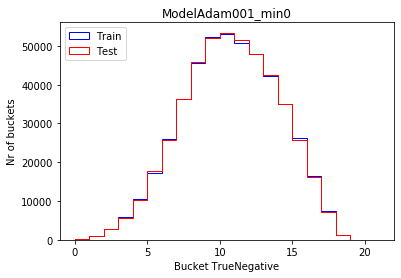

In [37]:
# overlay train and test we expect train to be better than test 
def plot_train_test_TrueNegative(nparray_bucket_TrueNegative_Train,nparray_bucket_TrueNegative_Test,modelName):
    plt.hist(nparray_bucket_TrueNegative_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_TrueNegative_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket TrueNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_TrueNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_TrueNegative(nparray_bucket_TrueNegative_Train,nparray_bucket_TrueNegative_Test,modelName)

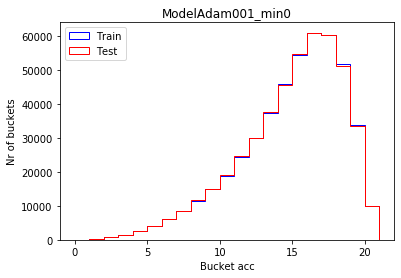

In [38]:
# overlay train and test we expect train to be better than test 
def plot_train_test_acc(nparray_bucket_acc_Train,nparray_bucket_acc_Test,modelName):
    plt.hist(nparray_bucket_acc_Train,bins=[i for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_acc_Test,bins=[i for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket acc')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_acc.png")
# done function
if doPlotMetrics2:
    plot_train_test_acc(nparray_bucket_acc_Train,nparray_bucket_acc_Test,modelName)

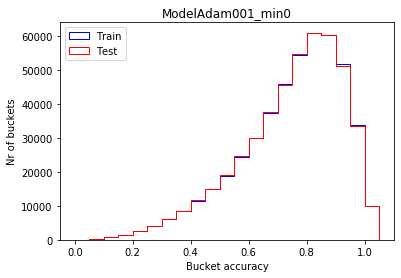

In [39]:
# overlay train and test we expect train to be better than test 
def plot_train_test_accuracy(nparray_bucket_accuracy_Train,nparray_bucket_accuracy_Test,modelName):
    plt.hist(nparray_bucket_accuracy_Train,bins=[i/20 for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_accuracy_Test,bins=[i/20 for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket accuracy')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_accuracy.png")
# done function
if doPlotMetrics2:
    plot_train_test_accuracy(nparray_bucket_accuracy_Train,nparray_bucket_accuracy_Test,modelName)

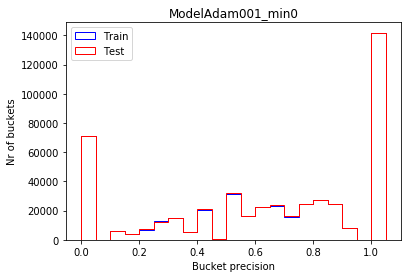

In [40]:
# overlay train and test we expect train to be better than test 
def plot_train_test_precision(nparray_bucket_precision_Train,nparray_bucket_precision_Test,modelName):
    plt.hist(nparray_bucket_precision_Train,bins=[i/20 for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_precision_Test,bins=[i/20 for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket precision')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_precision.png")
# done function
if doPlotMetrics2:
    plot_train_test_precision(nparray_bucket_precision_Train,nparray_bucket_precision_Test,modelName)

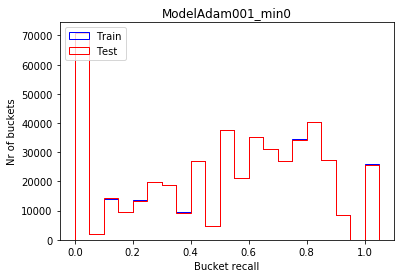

In [41]:
# overlay train and test we expect train to be better than test 
def plot_train_test_recall(nparray_bucket_recall_Train,nparray_bucket_recall_Test,modelName):
    plt.hist(nparray_bucket_recall_Train,bins=[i/20 for i in range(22)],alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_recall_Test,bins=[i/20 for i in range(22)],alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket recall')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_recall.png")
# done function
if doPlotMetrics2:
    plot_train_test_recall(nparray_bucket_recall_Train,nparray_bucket_recall_Test,modelName)